### The Street View House Numbers (SVHN) Dataset
[http://ufldl.stanford.edu/housenumbers/]

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data preprocessing and formatting. It can be seen as similar in flavor to MNIST (e.g., the images are of small cropped digits), but incorporates an order of magnitude more labeled data (over 600,000 digit images) and comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

Dataset:
https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

The goal of this project is to take an image from the SVHN dataset and determine what that digit is.
This is a multi-class classification problem with 10 classes, one for each digit 0-9. Digit '1' has label 1,
'9' has label 9 and '0' has label 10.

Although, there are close to 6,00,000 images in this dataset, we have extracted 60,000 images
(42000 training and 18000 test images) to do this project. The data comes in a MNIST-like format of
32-by-32 RGB images centred around a single digit (many of the images do contain some distractors
at the sides). 

### Goals:

The objective of the project is to learn how to implement a simple image classification
pipeline based on the k-Nearest Neighbour and a deep neural network. The goals of this
assignment are as follows:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Import libraries

import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
import tensorflow as tf
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.callbacks import Callback
from keras.layers import Reshape, Dense, Activation, Dropout, Flatten, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D
from keras.utils import np_utils

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0) # Set default figure size

Using TensorFlow backend.


### Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)


In [0]:
BASE_PATH = './drive/My Drive/Colab Notebooks/dataset/PGAIML/Residency7-Project/Project2/'

BATCH_SIZE = 32
INPUT_SIZE = 32
EPOCHS = 20

input_shape = (INPUT_SIZE,INPUT_SIZE,)

### Data fetching and understand the train/val/test splits.

In [4]:
# Open the file as readonly
h5f = h5py.File(BASE_PATH+'SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


### Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
neighbors = list(range(1,11))


# empty list that will hold cv scores
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train[:,:,0], y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f'Score calculated for neigbour {k} = {cv_scores[k-1]}')


Score calculated for neigbour 1 = 0.1082390300614829
Score calculated for neigbour 2 = 0.1147146740993373
Score calculated for neigbour 3 = 0.11611878981198565
Score calculated for neigbour 4 = 0.11666705537254904
Score calculated for neigbour 5 = 0.11673906873978383
Score calculated for neigbour 6 = 0.11521430645624042
Score calculated for neigbour 7 = 0.11623904672046885
Score calculated for neigbour 8 = 0.11723930705436562
Score calculated for neigbour 9 = 0.11866624065703316
Score calculated for neigbour 10 = 0.1179754808713894


The optimal number of neighbors is 9


Text(0,0.5,'Misclassification Error')

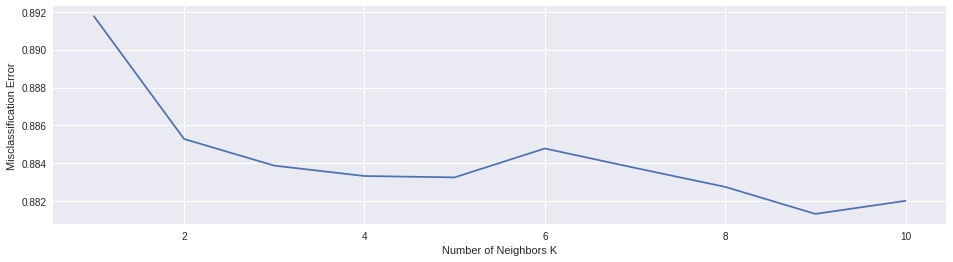

In [6]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

In [7]:
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors= optimal_k)
model.fit(X_train[:,:,0], y_train)
y_pred = model.predict(X_test[:,:,0])

# Calculate Accuracy Rate by using accuracy_score()
print("Accuracy Rate, of k={%i} neighbours which is calculated by accuracy_score() is: %f" 
      % (optimal_k,accuracy_score(y_test, y_pred)))

Accuracy Rate, of k={9} neighbours which is calculated by accuracy_score() is: 0.115500


### Print the classification metric report (2.5 points)


In [8]:
from sklearn.metrics import classification_report

map_characters = {0:'Zero',1:'One',2:'Two',3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven', 8:'Eight',9:'Nine'}
                  
#print('\n',classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    
print('\n',classification_report(y_test, y_pred, target_names=list(map_characters.values())), sep='')    




             precision    recall  f1-score   support

       Zero       0.14      0.23      0.17      1814
        One       0.14      0.27      0.18      1828
        Two       0.11      0.14      0.12      1803
      Three       0.10      0.12      0.11      1719
       Four       0.10      0.09      0.09      1812
       Five       0.10      0.08      0.09      1768
        Six       0.10      0.07      0.08      1832
      Seven       0.11      0.06      0.08      1808
      Eight       0.11      0.05      0.07      1812
       Nine       0.09      0.04      0.05      1804

avg / total       0.11      0.12      0.11     18000



### Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)


### Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)


### Implement batch normalization for training the neural network (2.5 points)

In [9]:
# Define Model
model = Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(Reshape((1024,),input_shape=input_shape))

#Normalize the data
model.add(BatchNormalization())

#Add 1st hidden layer
model.add(Dense(200, activation='relu'))


#Add 2nd hidden layer
model.add(Dense(100, activation='relu'))

#Add 3rd hidden layer
model.add(Dense(60, activation='relu'))

#Add 4th hidden layer
model.add(Dense(30, activation='relu'))

#Add OUTPUT layer
model.add(Dense(10, activation='softmax'))


#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
Total para

In [10]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=EPOCHS, batch_size=BATCH_SIZE)


Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 14s 338us/step - loss: 1.9523 - acc: 0.3139 - val_loss: 1.4396 - val_acc: 0.5359
Epoch 2/20
42000/42000 [==============================] - 12s 289us/step - loss: 1.2439 - acc: 0.6027 - val_loss: 1.0137 - val_acc: 0.6850
Epoch 3/20
42000/42000 [==============================] - 12s 288us/step - loss: 1.0232 - acc: 0.6797 - val_loss: 0.8498 - val_acc: 0.7431
Epoch 4/20
42000/42000 [==============================] - 12s 290us/step - loss: 0.9026 - acc: 0.7168 - val_loss: 0.7950 - val_acc: 0.7567
Epoch 5/20
42000/42000 [==============================] - 12s 288us/step - loss: 0.8276 - acc: 0.7421 - val_loss: 0.7524 - val_acc: 0.7689
Epoch 6/20
42000/42000 [==============================] - 12s 287us/step - loss: 0.7741 - acc: 0.7580 - val_loss: 0.6919 - val_acc: 0.7872
Epoch 7/20
42000/42000 [==============================] - 12s 288us/step - loss: 0.7340 - acc: 0.7705 - val_loss: 0.

In [22]:
from sklearn.metrics import accuracy_score

y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print(f'Training Accuracy score of the model = {accuracy_score(y_pred, y_test)}')


Training Accuracy score of the model = 0.7833333333333333


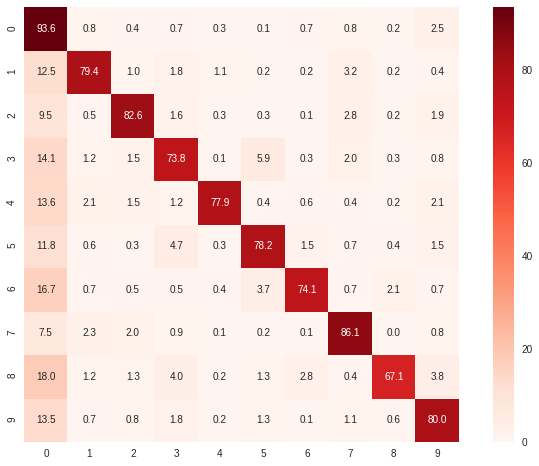

In [24]:
from sklearn.metrics import confusion_matrix

# Set the figure size
plt.figure(figsize=(12, 8))

# Calculate the confusion matrix
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)
cm = confusion_matrix(y_true=Y_true, y_pred=Y_pred_classes)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100.0

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Reds', fmt='.1f', square=True);